<a href="https://colab.research.google.com/github/H2IA/escola-de-verao-2021/blob/main/notebooks/colab/ConjuntoDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

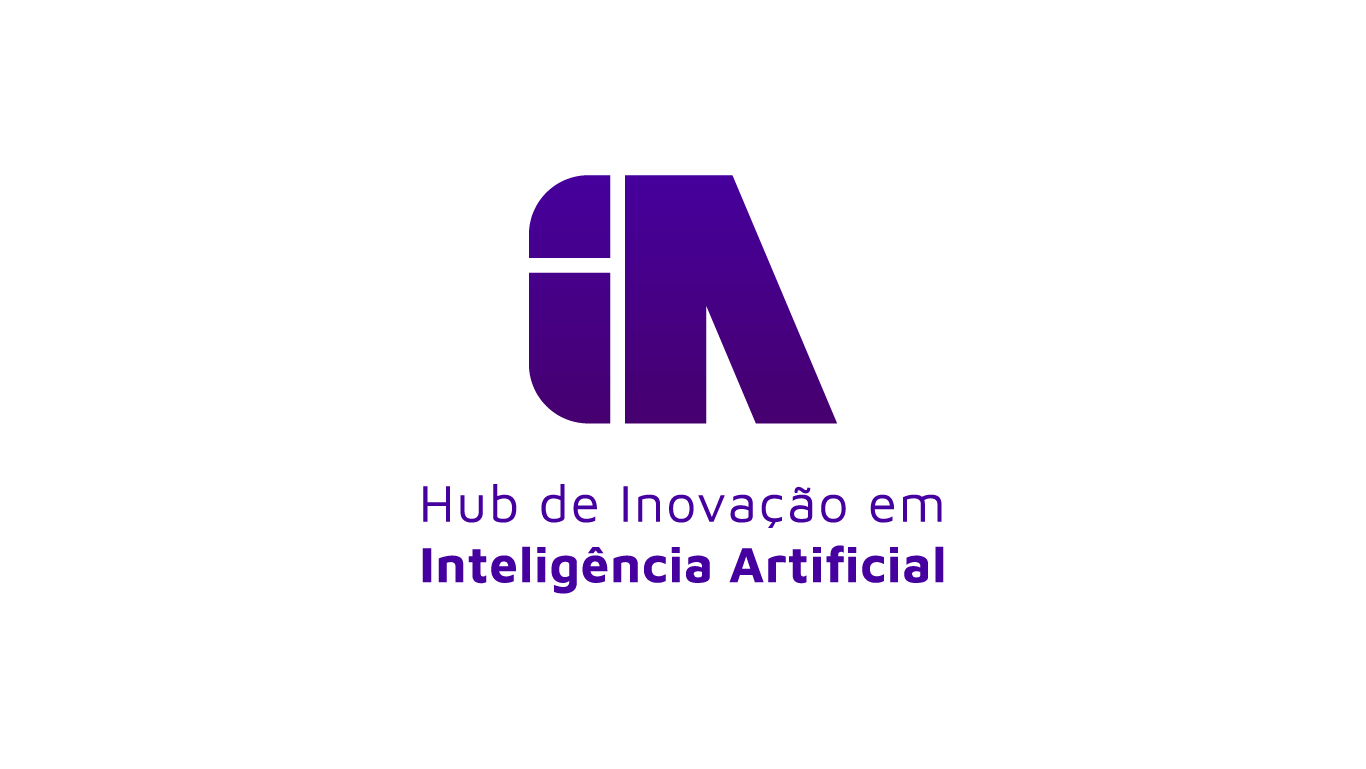


#Conjunto de Dados

O scikit-learn vem com alguns conjuntos de dados padrão que não exigem o download de nenhum arquivo de algum site externo. Por exemplo: `load_iris()`.

A variável `conjunto_de_dados` representa um objeto Python que funciona como um dicionário. As chaves importantes do dicionário a considerar são os nomes dos rótulos de classificação (`target_names`), os rótulos reais (`target`), os nomes de atributo/característica (`feature_names`) e os atributos (`data`).



In [2]:
from sklearn.datasets import load_iris

# Carregar a base de dados
conjunto_de_dados = load_iris()

In [3]:
nomes_rotulo = conjunto_de_dados['target_names']
rotulos = conjunto_de_dados['target']
nomes_feature = conjunto_de_dados['feature_names']
features = conjunto_de_dados['data']

In [4]:
# Olhar para a base de dados
print(nomes_rotulo)
print(rotulos[0])
print(nomes_feature[0])
print(features[0])

['setosa' 'versicolor' 'virginica']
0
sepal length (cm)
[5.1 3.5 1.4 0.2]


#Organizando os Dados em Conjuntos

Para avaliar o desempenho de um classificador, você deve sempre testar o modelo em dados não visualizados. Portanto, antes da construção de um modelo, divida seus dados em duas partes: um **conjunto de treino** e um **conjunto de teste**.

A função `train_test_split()` divide seus dados nesses conjuntos.

In [5]:
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados
treino, teste, rotulos_treino, rotulos_teste = train_test_split(features, rotulos, test_size=0.30)
#treino, teste, rotulos_treino, rotulos_teste = train_test_split(features, rotulos, test_size=0.30, random_state=42, stratify=None)

A função divide aleatoriamente os dados usando o parâmetro `test_size`. Por exemplo: um conjunto de teste (*test*) que representa 30% do conjunto de dados original.

`test_size` representa o porção/pedaço do conjunto de dados que será reservada para teste. Se um número inteiro for repassado, ele representará quantos exemplos serão reservados para teste. De outra forma, se um número real for repassado, ele será interpretado como a porcentagem do conjunto de dados original a ser reservada para teste.

`random_state` é o parâmetro que passa a semente de inicialização do sistema de geração de números aleatórios usado pela biblioteca.

Ele é importante, principalmente, para a reprodutibilidade de experimentos.


Os conjuntos de teste e de treino serão reservados mantendo a proporção de rótulos apresentada no parâmetro `stratify`, que deve receber uma listagem dos rótulos dos exemplos.


#Construindo o Modelo

In [6]:
from sklearn.linear_model import Perceptron

# Inicializar nosso classificador
p = Perceptron()

# Treinar nosso classificador
modelo = p.fit(treino, rotulos_treino)

In [7]:
modelo

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

#Testando o Modelo

Depois de treinarmos o modelo, podemos usar o modelo treinado para fazer previsões no nosso conjunto de teste, o que fazemos utilizando a função `predict()`. 

A função `predict()` retorna uma matriz de previsões para cada instância de dados no conjunto de teste.



In [8]:
# Fazer previsões
previsoes = p.predict(teste)
print(previsoes)

[0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 2 2 2 0 0 2 0 2 2 0 2 0 0 0 2 2 0 0 2 0
 0 0 2 0 2 0 0 2]


# Validação Cruzada

A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. 

Realizamos várias divisões de treino e teste para avaliar o modelo em vários cenários de amostragem.

O parâmetro `cv` da função `cross_val_score` representa o número de porções (folds). O valor padrão para este parâmetro é 5, ou seja, o conjunto de dados é dividido em 5 porções. Ainda, os dados são separados em porções estratificadas, ou seja, cada porção terá aproximadamente a mesma quantidade de exemplos de cada classe. 

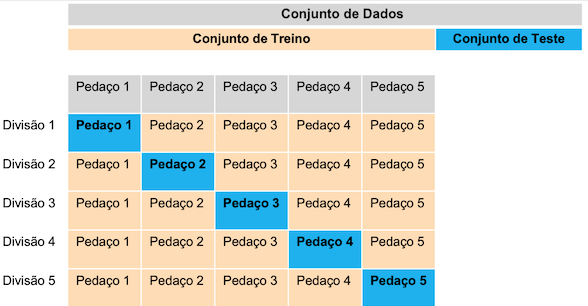

In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo, features, rotulos, cv=5, scoring='accuracy')
scores

array([0.66666667, 0.7       , 0.76666667, 0.83333333, 0.66666667])

In [14]:
f'{scores.mean()} std {scores.std()}'

'0.7266666666666667 std 0.06463573143221775'

O retorno da função é uma lista contendo os resultados de aplicação da métrica selecionada em cada um dos modelos.

Note que os modelos não são retornados pelo método, assim sendo, essa técnica avalia a qualidade da arquitetura/técnica proposta. 

# Avaliando o Modelo

Usando a matriz de rótulos de classe verdadeira, podemos avaliar as métricas dos valores previstos do nosso modelo comparando as duas matrizes (`rotulos_teste` x `previsoes`). 



In [ ]:
from sklearn.metrics import accuracy_score

# Avaliar o modelo
print(accuracy_score(rotulos_teste, previsoes))